In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [286]:
# Sigmoid function for squashing
def sigmoid(w, X, b):
    z = np.dot(X, w)+b
    return 1/(1+np.exp(-z))

In [287]:
# Cost function
def cost(Y, w, X, b):
    Y_pred = sigmoid(w, X, b)
    
    no = (1-Y) * np.log(1.01-Y_pred)
    yes = Y * np.log(Y_pred+0.01)
    
    j = np.mean(no+yes)
    
    return j

In [288]:
# Gradient function
def gradient(Y, w, X, b):
    Y_pred = sigmoid(w, X, b)
    
    d_w = -np.mean(np.dot(X.T, Y_pred-Y))
    d_b = -np.mean(Y-Y_pred)

    return d_w, d_b

In [289]:
# Gradient Descent
def grad_descent(Y, w, X, b, epoch, learn_rate):
    loss = []
    
    for i in range(epoch):
        d_w, d_b = gradient(Y, w, X, b)
        
        w -= learn_rate*d_w
        b -= learn_rate*d_b
        loss.append(cost(Y, w, X, b))

    return w, b, loss

In [290]:
# initialize logistic regression

def initialize(X, Y):
    
    w = np.random.randn(len(X[0]))*0.01
    b = 0
    learn_rate = 0.001
    epoch = 1000

    w, b, loss = grad_descent(Y, w, X, b, epoch, learn_rate)

    return w, b, loss

In [291]:
# Load dataset
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [292]:
#Extract X and Y out of dataset

X = df[['Age', 'EstimatedSalary']]
Y = df[['Purchased']]

In [293]:
# Convert dataframes to np arrays
X = X.to_numpy().astype(np.float64)
Y = Y.to_numpy()

In [294]:
# Normalize values of x
X = X/X.max(axis=0)

# Converting y from 2d to 1d array
Y = Y.ravel()

In [295]:
# Calling Logistic Regression
w, b, loss = initialize(X, Y)

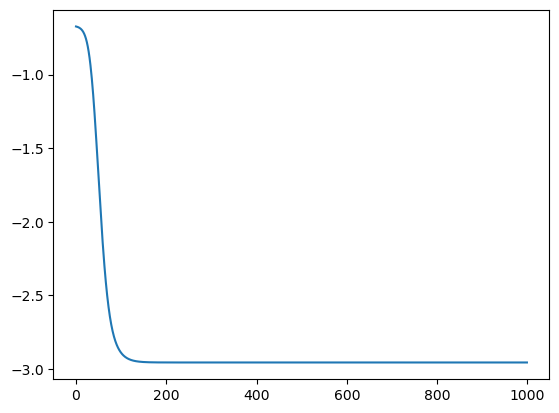

In [296]:
# Visual representation of loss curve
plt.plot(loss)